In [10]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [11]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]] 

 [[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]]


Solution
===

In [12]:
def naive(p, q):
    ''' fill your code in here...
    '''
    p_dimension = p.shape[0]
    q_dimension = q.shape[0]
    d = np.zeros((p_dimension, q_dimension))
    for i in range(0, p_dimension):
        for j in range(0, q_dimension):
            d[i,j] = math.sqrt(math.pow((p[i, 0]-q[j, 0]), 2) + math.pow((p[i, 1]-q[j, 1]), 2))
    return d

naive(p, q)

array([[ 0.60599073,  0.93659449,  0.91124856,  0.59321356,  0.27561751],
       [ 0.80746999,  0.21102354,  0.67268649,  0.22495084,  0.46534491],
       [ 0.35654215,  0.75217493,  0.57200052,  0.49900068,  0.23310825],
       [ 0.67281411,  0.52407472,  0.31520226,  0.63212897,  0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [13]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [14]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]]

[[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]

In [54]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    p_ravel = p[rows.ravel()]
    q_ravel = q[cols.ravel()]
    D = np.sqrt(np.sum(np.power((p_ravel - q_ravel), 2), axis=1 ))
    return D 

with_indices(p, q)

array([ 0.60599073,  0.93659449,  0.91124856,  0.59321356,  0.27561751,
        0.80746999,  0.21102354,  0.67268649,  0.22495084,  0.46534491,
        0.35654215,  0.75217493,  0.57200052,  0.49900068,  0.23310825,
        0.67281411,  0.52407472,  0.31520226,  0.63212897,  0.70277376])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [25]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)
print(scipy_version(p, q))

[[ 0.60599073  0.93659449  0.91124856  0.59321356  0.27561751]
 [ 0.80746999  0.21102354  0.67268649  0.22495084  0.46534491]
 [ 0.35654215  0.75217493  0.57200052  0.49900068  0.23310825]
 [ 0.67281411  0.52407472  0.31520226  0.63212897  0.70277376]]


### Numpy Magic

In [26]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))
print(tensor_broadcasting(p,q))

[[ 0.60599073  0.93659449  0.91124856  0.59321356  0.27561751]
 [ 0.80746999  0.21102354  0.67268649  0.22495084  0.46534491]
 [ 0.35654215  0.75217493  0.57200052  0.49900068  0.23310825]
 [ 0.67281411  0.52407472  0.31520226  0.63212897  0.70277376]]


# Compare methods

In [22]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

10 loops, best of 3: 20.5 ms per loop
The slowest run took 4.94 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 73.8 µs per loop
1000 loops, best of 3: 832 µs per loop
100 loops, best of 3: 4.68 ms per loop


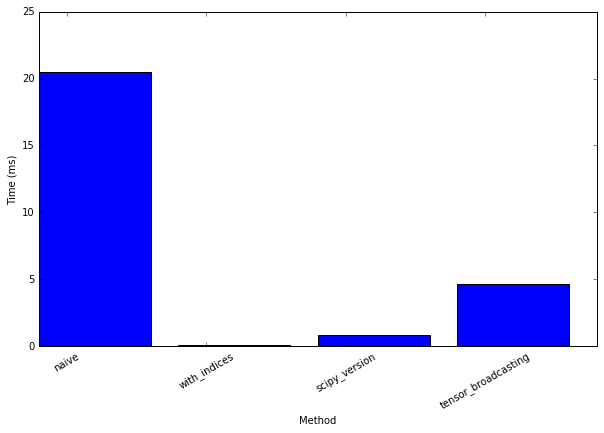

In [23]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')